In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import rospy
import os

In [170]:
data_folder = 'data_sim'

ee_desired_df = pd.read_csv(os.path.join(data_folder,'1A_2_0_end_effector_pose_desired_log.csv'))
ee_real_df = pd.read_csv(os.path.join(data_folder,'1A_2_0_end_effector_log.csv'))
cost_df = pd.read_csv(os.path.join(data_folder,'1A_2_0_cost_log.csv'))
cost_min_df = pd.read_csv(os.path.join(data_folder,'1A_2_0_min_rollout_cost_log.csv'))
cost_max_df = pd.read_csv(os.path.join(data_folder,'1A_2_0_max_rollout_cost_log.csv'))

In [171]:
# cut time after 60s
time_delta = 60E9
ee_desired_df = ee_desired_df.loc[ee_desired_df['time']<ee_desired_df['time'].min()+time_delta]
ee_real_df = ee_real_df.loc[ee_real_df['time']<ee_real_df['time'].min()+time_delta]
cost_df = cost_df.loc[cost_df['time']<cost_df['time'].min()+time_delta]
cost_min_df = cost_min_df.loc[cost_min_df['time']<cost_min_df['time'].min()+time_delta]
cost_max_df = cost_max_df.loc[cost_max_df['time']<cost_max_df['time'].min()+time_delta]

# sync time:
#ee_desired_df['_time_synced'] = ee_desired_df['time']
#ee_desired_df['_time_synced_percentage'] = ee_desired_df['time']
#min_time = ee_desired_df['time'].iloc[0]
#max_time = ee_desired_df['time'].iloc[-1]

#ee_real_df['_time_percentage'] = ( ee_real_df['time'] - ee_real_df['time'].min() ) / ( ee_real_df['time'].max() - ee_real_df['time'].min() )
#cost_df['_time_percentage'] =  ( cost_df['time'] - cost_df['time'].min() ) / ( cost_df['time'].max() - cost_df['time'].min() )


#ee_real_df['_time_synced_percentage'] = ( min_time + (max_time-min_time)*ee_real_df['_time_percentage'] ).astype(int)
#cost_df['_time_synced_percentage'] = ( min_time + (max_time-min_time)*cost_df['_time_percentage'] ).astype(int)



unified_df = pd.merge_asof(ee_desired_df, ee_real_df, on='time', suffixes=('_DESI', '_REAL'), direction='nearest')
unified_df = pd.merge_asof(unified_df, cost_df, on='time', direction='nearest')
unified_df = pd.merge_asof(unified_df, cost_min_df, on='time', direction='nearest')
unified_df = pd.merge_asof(unified_df, cost_max_df, on='time', direction='nearest')

In [172]:
unified_df['_distance'] = np.sqrt( (unified_df['pos_x_DESI']-unified_df['pos_x_REAL'])**2 + (unified_df['pos_y_DESI']-unified_df['pos_y_REAL'])**2 + (unified_df['pos_z_DESI']-unified_df['pos_z_REAL'])**2)
unified_df

,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,pos_y_REAL,pos_z_REAL,orient_x_REAL,orient_y_REAL,orient_z_REAL,orient_w_REAL,cost,min_rollout_cost,max_rollout_cost,_distance
0,29,1610276690106558084,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210002,...,-0.299130,0.300642,0.999999,-0.001548,-0.000117,-0.000625,0.000319,0.023840,50.300361,0.001506
1,30,1610276690206621885,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210012,...,-0.299329,0.300663,0.999998,-0.001739,-0.000242,-0.000235,0.000319,0.023840,29.892555,0.001390
2,31,1610276690306597948,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210022,...,-0.299081,0.300942,0.999998,-0.001723,-0.000307,0.000151,0.000319,0.023941,29.892555,0.001719
3,32,1610276690406560897,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210032,...,-0.298746,0.301322,0.999999,-0.001423,-0.000140,0.000290,0.000406,0.033190,31.193622,0.002172
4,33,1610276690506539106,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210042,...,-0.298174,0.301615,1.000000,-0.000731,0.000077,0.000273,0.000778,0.041870,29.096465,0.002783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,625,1610276749706558942,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,215884,...,-0.290949,0.296690,0.999880,-0.005341,0.013865,0.004425,0.062217,6.061098,43.468222,0.022923
597,626,1610276749806552886,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,215894,...,-0.291169,0.296608,0.999882,-0.005480,0.013648,0.004476,0.061809,6.082273,43.468222,0.022875
598,627,1610276749906555891,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,215904,...,-0.290997,0.296323,0.999887,-0.005384,0.013373,0.004313,0.061707,6.082273,52.853705,0.022950
599,628,1610276750006546020,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,215914,...,-0.290681,0.296169,0.999897,-0.004940,0.012861,0.004120,0.061398,5.903445,30.632164,0.023026


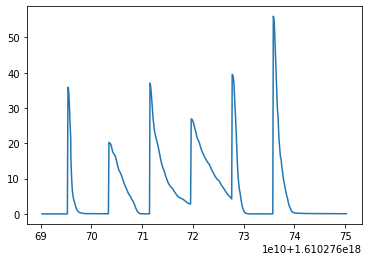

In [173]:
plt.plot(cost_df['time'], cost_df['cost'], label='cost')
plt.show()

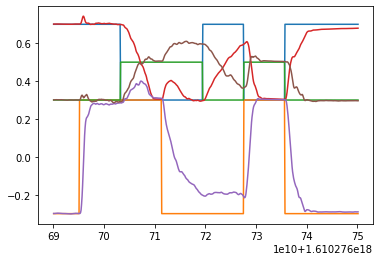

In [174]:
plt.plot(unified_df['time'], unified_df['pos_x_DESI'], label='distance')
plt.plot(unified_df['time'], unified_df['pos_y_DESI'], label='distance')
plt.plot(unified_df['time'], unified_df['pos_z_DESI'], label='distance')

plt.plot(unified_df['time'], unified_df['pos_x_REAL'], label='distance')
plt.plot(unified_df['time'], unified_df['pos_y_REAL'], label='distance')
plt.plot(unified_df['time'], unified_df['pos_z_REAL'], label='distance')

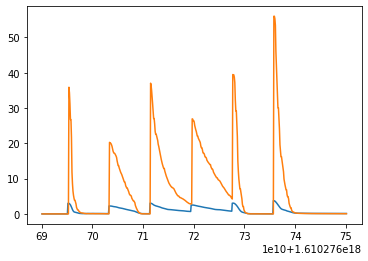

In [175]:
plt.plot(unified_df['time'], unified_df['_distance']*5, label='distance')
plt.plot(unified_df['time'], unified_df['cost'], label='distance')

,seq,time,pos_x,pos_y,pos_z,orient_x,orient_y,orient_z,orient_w,_time_percentage,_time_synced_percentage,_time_synced


In [51]:
ee_real_df

,seq,time,pos_x,pos_y,pos_z,orient_x,orient_y,orient_z,orient_w,_time_percentage,_time_synced_percentage,_time_synced
0,51414,1610265265103915679,0.700292,-0.300046,0.299167,1.000000,0.000370,-0.000758,-0.000207,0.000000,1610265265097545984,1610265265097545984
1,51415,1610265265114001373,0.700302,-0.300024,0.299224,1.000000,0.000404,-0.000727,-0.000176,0.000262,1610265265115859200,1610265265115906816
2,51416,1610265265124118388,0.700307,-0.300033,0.299256,1.000000,0.000410,-0.000695,-0.000128,0.000525,1610265265134229248,1610265265134267648
3,51417,1610265265134232902,0.700312,-0.300031,0.299276,1.000000,0.000422,-0.000673,-0.000098,0.000788,1610265265152594688,1610265265152628736
4,51418,1610265265144311602,0.700318,-0.300038,0.299273,1.000000,0.000426,-0.000658,-0.000074,0.001049,1610265265170895104,1610265265170989568
...,...,...,...,...,...,...,...,...,...,...,...,...
3803,55217,1610265303559898516,0.698673,-0.299101,0.299081,0.999977,0.006723,0.000017,-0.001216,0.998952,1610265334924162048,1610265334923980288
3804,55218,1610265303569977451,0.698690,-0.299095,0.299103,0.999977,0.006638,0.000053,-0.001152,0.999214,1610265334942462720,1610265334942341120
3805,55219,1610265303580073385,0.698709,-0.299082,0.299132,0.999978,0.006565,0.000080,-0.001081,0.999476,1610265334960794624,1610265334960702208
3806,55220,1610265303590165416,0.698719,-0.299082,0.299148,0.999979,0.006468,0.000073,-0.000991,0.999738,1610265334979119104,1610265334979063040


In [204]:
unified_df['_x_compare'] = unified_df['pos_x_DESI']!=unified_df['pos_x_DESI'].shift(1)
unified_df['_y_compare'] = unified_df['pos_y_DESI']!=unified_df['pos_y_DESI'].shift(1)
unified_df['_z_compare'] = unified_df['pos_z_DESI']!=unified_df['pos_z_DESI'].shift(1)

unified_df['_desi_changed'] = unified_df[['_x_compare','_y_compare','_z_compare']].any(axis='columns')
unified_df['_desi_changed'].iloc[0] = False
unified_df['_seq'] = 0

sequence=0
for idx, row in unified_df.iterrows():
    if row['_desi_changed']==True:
        sequence+=1
    
    unified_df.loc[idx, '_seq'] = sequence
    

for seq_idx in np.unique(unified_df['_seq'].to_list()):
    df_temp = unified_df.loc[unified_df['_seq']==seq_idx]
    df_temp.to_csv()

,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
0,29,1610276690106558084,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210002,...,0.000319,0.023840,50.300361,0.001506,True,True,True,False,0,0
1,30,1610276690206621885,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210012,...,0.000319,0.023840,29.892555,0.001390,False,False,False,False,0,0
2,31,1610276690306597948,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210022,...,0.000319,0.023941,29.892555,0.001719,False,False,False,False,0,0
3,32,1610276690406560897,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210032,...,0.000406,0.033190,31.193622,0.002172,False,False,False,False,0,0
4,33,1610276690506539106,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210042,...,0.000778,0.041870,29.096465,0.002783,False,False,False,False,0,0
5,34,1610276690606559038,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210051,...,0.000778,0.057376,18.706348,0.002912,False,False,False,False,0,0
6,35,1610276690706577062,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210061,...,0.000953,0.058382,18.706348,0.003046,False,False,False,False,0,0
7,36,1610276690806552886,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210071,...,0.001000,0.050482,21.893867,0.003133,False,False,False,False,0,0
8,37,1610276690906541109,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210081,...,0.001000,0.048269,19.663214,0.003223,False,False,False,False,0,0
9,38,1610276691006551980,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210091,...,0.001047,0.046575,19.497485,0.003173,False,False,False,False,0,0


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
51,80,1610276695207056045,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210505,...,0.000303,0.016584,22.593341,0.599188,False,True,False,True,1,1
52,81,1610276695306560039,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210515,...,0.000303,0.016584,3807.255259,0.599070,False,False,False,False,1,1
53,82,1610276695406549930,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210525,...,35.879171,3095.591107,3338.970347,0.594576,False,False,False,False,1,1
54,83,1610276695506522893,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210535,...,34.323784,2098.951482,2910.057335,0.581852,False,False,False,False,1,1
55,84,1610276695606527090,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210545,...,31.167715,2098.951482,2263.116709,0.550528,False,False,False,False,1,1
56,85,1610276695706545114,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210554,...,26.729053,1660.763091,1587.391437,0.510381,False,False,False,False,1,1
57,86,1610276695806548118,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210564,...,26.729053,964.046532,1587.391437,0.455032,False,False,False,False,1,1
58,87,1610276695906543970,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210574,...,21.704531,741.716167,1206.945206,0.386842,False,False,False,False,1,1
59,88,1610276696006544113,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210584,...,11.823853,604.381835,955.402385,0.313542,False,False,False,False,1,1
60,89,1610276696106542110,0.7,0.3,0.3,1.0,0.0,0.0,0.0,210594,...,8.544152,469.556974,588.570719,0.245606,False,False,False,False,1,1


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
132,161,1610276703307064056,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211305,...,0.031236,2.711151,58023.831103,0.449936,True,False,True,True,2,2
133,162,1610276703406547069,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211314,...,20.259823,2.874682,2168.280455,0.450110,False,False,False,False,2,2
134,163,1610276703506540060,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211324,...,20.166422,1877.750664,14961.826266,0.448914,False,False,False,False,2,2
135,164,1610276703606538057,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211334,...,20.059443,1878.701638,19041.225156,0.447755,False,False,False,False,2,2
136,165,1610276703706543922,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211344,...,19.875446,1878.701638,19041.225156,0.445402,False,False,False,False,2,2
137,166,1610276703806554079,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211354,...,19.554049,1692.606371,53823.884382,0.441596,False,False,False,False,2,2
138,167,1610276703906547069,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211364,...,19.105975,1689.343743,13823.878113,0.435491,False,False,False,False,2,2
139,168,1610276704006542921,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211374,...,18.432060,1648.465724,13823.878113,0.426947,False,False,False,False,2,2
140,169,1610276704106537103,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211383,...,17.798626,1648.465724,40645.772078,0.420362,False,False,False,False,2,2
141,170,1610276704206548929,0.3,0.3,0.5,1.0,0.0,0.0,0.0,211393,...,17.408873,1636.278690,28702.779389,0.415824,False,False,False,False,2,2


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
213,242,1610276711407217025,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212104,...,0.015897,1.474796,19.165978,0.609019,False,True,False,True,3,3
214,243,1610276711506547927,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212114,...,37.027926,3559.805953,19.914767,0.608422,False,False,False,False,3,3
215,244,1610276711606532096,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212124,...,36.346765,3559.805953,3824.841228,0.601929,False,False,False,False,3,3
216,245,1610276711706538915,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212134,...,34.957609,3193.745755,3494.188895,0.589655,False,False,False,False,3,3
217,246,1610276711806540966,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212144,...,33.114367,2830.118589,28776.319545,0.572767,False,False,False,False,3,3
218,247,1610276711906541109,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212154,...,31.131025,2503.817768,2775.871027,0.551435,False,False,False,False,3,3
219,248,1610276712006561994,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212164,...,28.896576,2372.820460,2775.871027,0.528899,False,False,False,False,3,3
220,249,1610276712106553077,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212173,...,27.018652,2277.262426,54449.163633,0.511191,False,False,False,False,3,3
221,250,1610276712206545114,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212183,...,27.018652,2206.920357,7447.710619,0.494507,False,False,False,False,3,3
222,251,1610276712306549072,0.3,-0.3,0.5,1.0,0.0,0.0,0.0,212193,...,25.513691,2181.903036,34205.878193,0.480583,False,False,False,False,3,3


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
294,323,1610276719507292032,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212905,...,2.838036,249.988237,32259.724629,0.509104,True,False,True,True,4,4
295,324,1610276719606575965,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212914,...,2.813638,259.283191,6673.065221,0.508068,False,False,False,False,4,4
296,325,1610276719706552028,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212924,...,26.932529,2552.992055,38658.710734,0.507442,False,False,False,False,4,4
297,326,1610276719806566953,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212934,...,26.848114,2528.997183,46509.366616,0.505880,False,False,False,False,4,4
298,327,1610276719906550884,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212944,...,26.402047,2434.900317,43499.410899,0.502349,False,False,False,False,4,4
299,328,1610276720006552934,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212954,...,26.402047,2307.582333,31337.005204,0.497875,False,False,False,False,4,4
300,329,1610276720106533050,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212964,...,26.018534,2343.625760,31337.005204,0.492105,False,False,False,False,4,4
301,330,1610276720206541061,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212974,...,25.009446,2287.776895,52261.601758,0.485255,False,False,False,False,4,4
302,331,1610276720306544065,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212983,...,24.412213,2179.139295,47283.123992,0.479178,False,False,False,False,4,4
303,332,1610276720406547069,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,212993,...,23.839790,2194.889128,63212.691430,0.472444,False,False,False,False,4,4


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
375,404,1610276727607261896,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213705,...,4.222212,352.114842,7418.981952,0.606486,True,True,True,True,5,5
376,405,1610276727706532955,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213714,...,39.485483,3691.134552,6922.561536,0.610232,False,False,False,False,5,5
377,406,1610276727806557893,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213724,...,39.391734,3691.134552,6922.561536,0.610374,False,False,False,False,5,5
378,407,1610276727906552076,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213734,...,39.391734,3521.980637,25720.462532,0.606594,False,False,False,False,5,5
379,408,1610276728006541967,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213744,...,38.740820,3007.560256,3746.369635,0.595795,False,False,False,False,5,5
380,409,1610276728106532096,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213754,...,37.235207,3007.560256,3548.077152,0.577844,False,False,False,False,5,5
381,410,1610276728206547975,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213764,...,32.283118,2648.077096,3065.990296,0.555709,False,False,False,False,5,5
382,411,1610276728306562900,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213774,...,29.152060,1860.827356,2293.704640,0.528482,False,False,False,False,5,5
383,412,1610276728406480073,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213784,...,29.152060,1860.827356,2293.704640,0.495443,False,False,False,False,5,5
384,413,1610276728506544113,0.3,0.3,0.5,1.0,0.0,0.0,0.0,213793,...,25.547315,1239.949469,1894.819626,0.462599,False,False,False,False,5,5


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
456,485,1610276735707045078,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214503,...,0.004660,0.400122,26.227564,0.748676,True,True,True,True,6,6
457,486,1610276735806540966,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214513,...,55.991025,0.409508,5837.406059,0.748211,False,False,False,False,6,6
458,487,1610276735906531095,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214523,...,55.991025,5162.646307,5267.387965,0.741899,False,False,False,False,6,6
459,488,1610276736006567001,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214533,...,55.285013,4679.436269,5267.387965,0.726463,False,False,False,False,6,6
460,489,1610276736106548070,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214542,...,53.400191,4312.596568,4900.266712,0.703253,False,False,False,False,6,6
461,490,1610276736206548929,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214552,...,45.986377,3413.184985,4397.850660,0.671489,False,False,False,False,6,6
462,491,1610276736306535005,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214562,...,41.944203,3062.293055,3964.341399,0.637266,False,False,False,False,6,6
463,492,1610276736406548976,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214572,...,37.788143,2727.349484,3472.690949,0.598830,False,False,False,False,6,6
464,493,1610276736506551027,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214582,...,33.690277,2348.333344,3100.548087,0.557867,False,False,False,False,6,6
465,494,1610276736606522083,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,214592,...,30.054158,2164.591290,2666.166324,0.517498,False,False,False,False,6,6


In [198]:
pd.set_option('display.max_rows', 600)

print(sum(unified_df['_desi_changed']))
display(unified_df.head(600))


6


,seq_DESI,time,pos_x_DESI,pos_y_DESI,pos_z_DESI,orient_x_DESI,orient_y_DESI,orient_z_DESI,orient_w_DESI,seq_REAL,...,cost,min_rollout_cost,max_rollout_cost,_distance,_x_compare,_y_compare,_z_compare,_desi_changed,_seq,seq
0,29,1610276690106558084,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210002,...,0.000319,0.023840,50.300361,0.001506,True,True,True,False,0,0
1,30,1610276690206621885,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210012,...,0.000319,0.023840,29.892555,0.001390,False,False,False,False,0,0
2,31,1610276690306597948,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210022,...,0.000319,0.023941,29.892555,0.001719,False,False,False,False,0,0
3,32,1610276690406560897,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210032,...,0.000406,0.033190,31.193622,0.002172,False,False,False,False,0,0
4,33,1610276690506539106,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210042,...,0.000778,0.041870,29.096465,0.002783,False,False,False,False,0,0
5,34,1610276690606559038,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210051,...,0.000778,0.057376,18.706348,0.002912,False,False,False,False,0,0
6,35,1610276690706577062,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210061,...,0.000953,0.058382,18.706348,0.003046,False,False,False,False,0,0
7,36,1610276690806552886,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210071,...,0.001000,0.050482,21.893867,0.003133,False,False,False,False,0,0
8,37,1610276690906541109,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210081,...,0.001000,0.048269,19.663214,0.003223,False,False,False,False,0,0
9,38,1610276691006551980,0.7,-0.3,0.3,1.0,0.0,0.0,0.0,210091,...,0.001047,0.046575,19.497485,0.003173,False,False,False,False,0,0
